In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
california_data_path = "/content/sample_data/california_housing_train.csv"
california_house_data = pd.read_csv(california_data_path)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

X = california_house_data[features]
y = california_house_data.median_house_value

print(california_house_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
# definição de modelo DecisionTreeRegressor
decision_model = DecisionTreeRegressor(random_state=0)
decision_model.fit(X,y)

# definição de modelo RandomForestRegressor
rand_forest_model = RandomForestRegressor(random_state=0)
rand_forest_model.fit(X,y)

RandomForestRegressor(random_state=0)

In [ ]:
# predição com variáveis de teste e validação in-sample

predict_DTR = decision_model.predict(X)
mse_DTR = mean_squared_error(y, predict_DTR)
mae_DTR = mean_absolute_error(y, predict_DTR)
print("DTR - MSE: %d \t\t DTR - MAE: %d" % (mse_DTR,mae_DTR))

predict_RFR = rand_forest_model.predict(X)
mse_RFR = mean_squared_error(y, predict_RFR)
mae_RFR = mean_absolute_error(y, predict_RFR)
print("RFR - MSE: %d \t\t DTR - MAE: %d" % (mse_RFR,mae_RFR))

DTR - MSE: 0 		 DTR - MAE: 0
RFR - MSE: 329498272 		 DTR - MAE: 11710


In [ ]:
# gera variáveis (dataframes) de treinamento e validação

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=3)

In [ ]:
def rfr_opt(max_leaf_nodes, n_estimators, train_X, val_X, train_y, val_y):
    mean_errors_list = []
    this_model = RandomForestRegressor(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes,random_state=0)
    this_model.fit(train_X,train_y)
    this_prediction = this_model.predict(val_X)
    mean_errors_list.append(mean_squared_error(val_y,this_prediction))
    mean_errors_list.append(mean_absolute_error(val_y,this_prediction))
    return(mean_errors_list)

def dtr_opt(max_leaf_nodes, train_X, val_X, train_y, val_y):
    mean_errors_list = []
    this_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    this_model.fit(train_X,train_y)
    this_prediction = this_model.predict(val_X)
    mean_errors_list.append(mean_squared_error(val_y,this_prediction))
    mean_errors_list.append(mean_absolute_error(val_y,this_prediction))
    return(mean_errors_list)

RFR - Nódulos máximos: 5 		 Qtd. de Árvores: 5 		 MSE: 7158420347 		 MAE: 64212
RFR - Nódulos máximos: 5 		 Qtd. de Árvores: 50 		 MSE: 6988941398 		 MAE: 63383
RFR - Nódulos máximos: 5 		 Qtd. de Árvores: 100 		 MSE: 6997809303 		 MAE: 63457
RFR - Nódulos máximos: 50 		 Qtd. de Árvores: 5 		 MSE: 4056285545 		 MAE: 44792
RFR - Nódulos máximos: 50 		 Qtd. de Árvores: 50 		 MSE: 3879949008 		 MAE: 43754
RFR - Nódulos máximos: 50 		 Qtd. de Árvores: 100 		 MSE: 3885697551 		 MAE: 43743
RFR - Nódulos máximos: 500 		 Qtd. de Árvores: 5 		 MSE: 3043397541 		 MAE: 36843
RFR - Nódulos máximos: 500 		 Qtd. de Árvores: 50 		 MSE: 2662277086 		 MAE: 34653
RFR - Nódulos máximos: 500 		 Qtd. de Árvores: 100 		 MSE: 2689310371 		 MAE: 34746
RFR - Nódulos máximos: 5000 		 Qtd. de Árvores: 5 		 MSE: 3114019441 		 MAE: 36514
RFR - Nódulos máximos: 5000 		 Qtd. de Árvores: 50 		 MSE: 2504492048 		 MAE: 32494
RFR - Nódulos máximos: 5000 		 Qtd. de Árvores: 100 		 MSE: 2500409265 		 MAE: 32454
RFR - Nódu

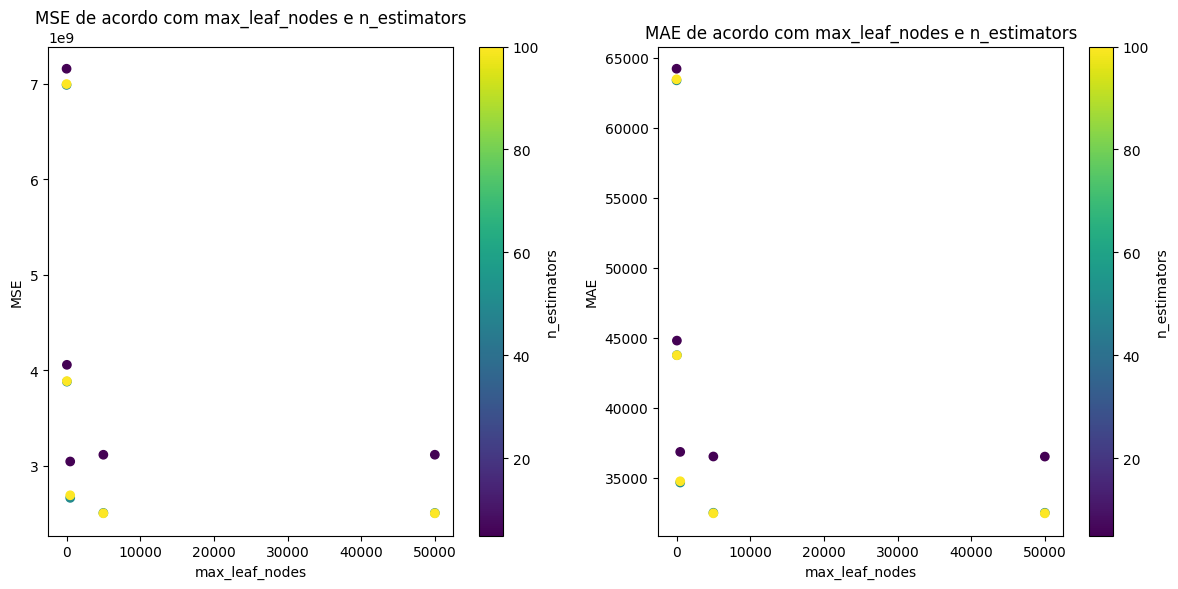

In [ ]:
# faz a otimização de hiperparâmetros para max_leaf_nodes e n_estimators (número de árvores) do modelo RFR com validação out-sample
# NÃO EXECUTAR ANTES DE DEFIINIR A FUNÇÃO rfr_opt() E AS VARIÁVEIS DE TREINAMENTO

max_leaf_nodes_values = []
n_estimators_values = []
mse_values = []
mae_values = []

for max_leaf_nodes in [5, 50, 500, 5000, 50000]:
  for n_estimators in [5, 50, 100]:
    mean_errors_list = rfr_opt(max_leaf_nodes, n_estimators, train_X, val_X, train_y, val_y).copy()
    max_leaf_nodes_values.append(max_leaf_nodes)
    n_estimators_values.append(n_estimators)
    mse_values.append(mean_errors_list[0])
    mae_values.append(mean_errors_list[1])
    print("RFR - Nódulos máximos: %d \t\t Qtd. de Árvores: %d \t\t MSE: %d \t\t MAE: %d" %(max_leaf_nodes,n_estimators,mean_errors_list[0],mean_errors_list[1]))

# plota as informações de acordo com os MSE/MAE da otimização de hiperparâmetro

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(max_leaf_nodes_values, mse_values, c=n_estimators_values, cmap='viridis')
plt.xlabel("max_leaf_nodes")
plt.ylabel("MSE")
plt.title("MSE de acordo com max_leaf_nodes e n_estimators")
plt.colorbar(label="n_estimators")

plt.subplot(1, 2, 2)
plt.scatter(max_leaf_nodes_values, mae_values, c=n_estimators_values, cmap='viridis')
plt.xlabel("max_leaf_nodes")
plt.ylabel("MAE")
plt.title("MAE de acordo com max_leaf_nodes e n_estimators")
plt.colorbar(label="n_estimators")

plt.tight_layout()
plt.show()

DTR - Nódulos máximos: 5 		 MSE: 7428847063 		 MAE: 65544
DTR - Nódulos máximos: 50 		 MSE: 4296865050 		 MAE: 45965
DTR - Nódulos máximos: 500 		 MSE: 4117051658 		 MAE: 40698
DTR - Nódulos máximos: 5000 		 MSE: 4980952096 		 MAE: 43957
DTR - Nódulos máximos: 10000 		 MSE: 4992306097 		 MAE: 44218
DTR - Nódulos máximos: 15000 		 MSE: 4991649744 		 MAE: 44210
DTR - Nódulos máximos: 25000 		 MSE: 4991649744 		 MAE: 44210
DTR - Nódulos máximos: 35000 		 MSE: 4991649744 		 MAE: 44210
DTR - Nódulos máximos: 50000 		 MSE: 4991649744 		 MAE: 44210


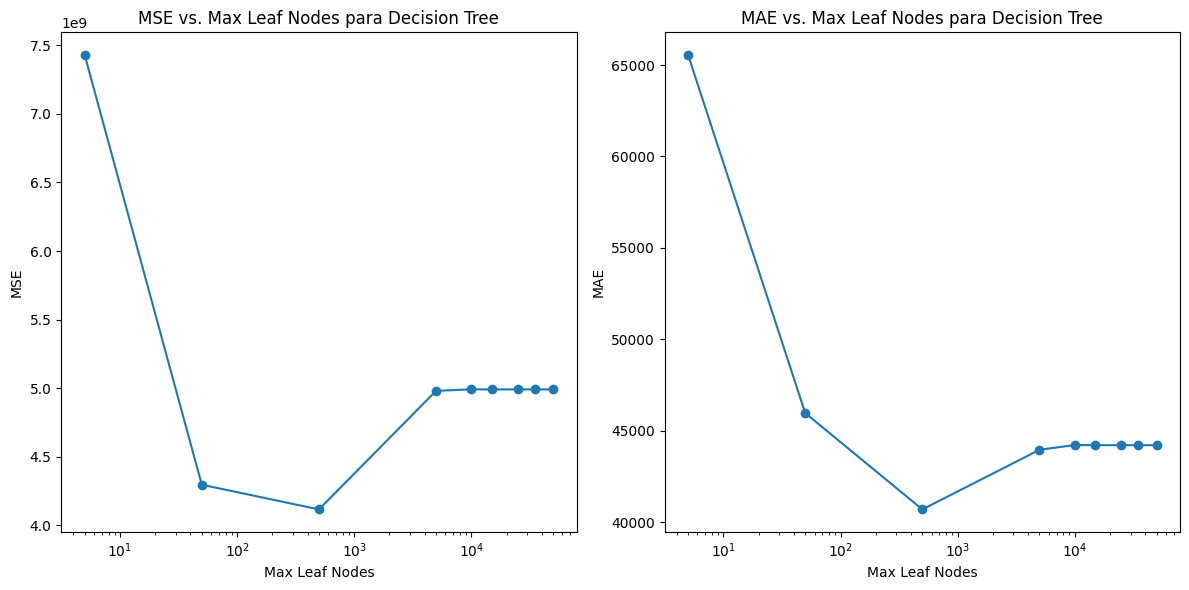

In [ ]:
# faz a otimização de hiperparâmetros para max_leaf_nodes e n_estimators (número de árvores) do modelo DTR com validação out-sample
# NÃO EXECUTAR ANTES DE DEFIINIR A FUNÇÃO dtr_opt()

max_leaf_nodes_values = []
mse_values = []
mae_values = []

for max_leaf_nodes in [5, 50, 500, 5000, 10000, 15000, 25000, 35000, 50000]:
  mean_errors_list = dtr_opt(max_leaf_nodes, train_X, val_X, train_y, val_y).copy()
  max_leaf_nodes_values.append(max_leaf_nodes)
  mse_values.append(mean_errors_list[0])
  mae_values.append(mean_errors_list[1])
  print("DTR - Nódulos máximos: %d \t\t MSE: %d \t\t MAE: %d" %(max_leaf_nodes,mean_errors_list[0],mean_errors_list[1]))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_leaf_nodes_values, mse_values, marker='o')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("MSE")
plt.title("MSE vs. Max Leaf Nodes para Decision Tree")
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(max_leaf_nodes_values, mae_values, marker='o')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("MAE")
plt.title("MAE vs. Max Leaf Nodes para Decision Tree")
plt.xscale('log')

plt.tight_layout()
plt.show()

15166    341500.0
281      122900.0
13444    250000.0
4201     134800.0
1343     112500.0
           ...   
14721    231800.0
9753      76100.0
15308    162500.0
617      118200.0
3167     232600.0
Name: median_house_value, Length: 4250, dtype: float64
[311159.25925926 135470.16574586 309580.05       ... 115177.39130435
 135470.16574586 264650.        ]
[311338.62666667 149935.24722222 310354.76714286 ... 110399.7742785
 134465.82539683 244907.50904762]
MSE - DTR: 4117051658 		 MAE - DTR: 40698
MSE - RFR: 2500409265 		 MAE - RFR: 32454


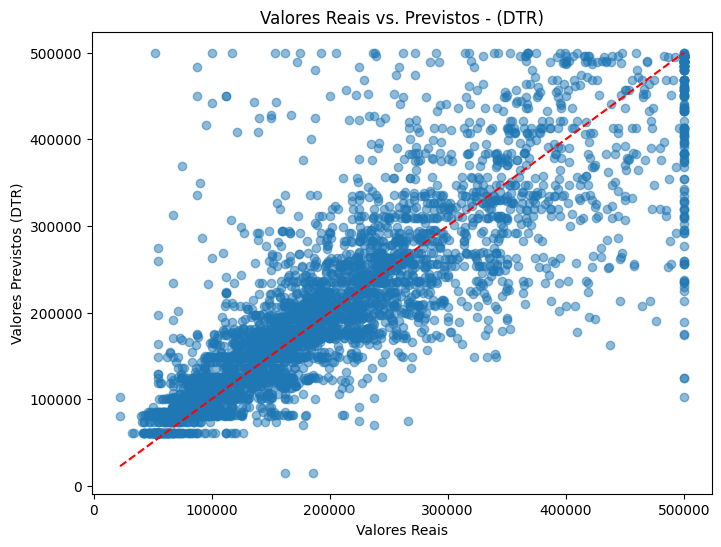

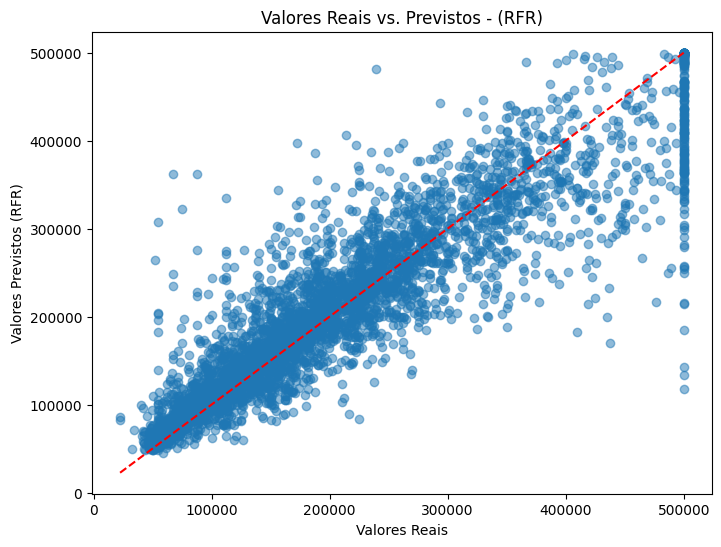

In [ ]:
best_dtr_model = DecisionTreeRegressor(max_leaf_nodes=500,random_state=0)
best_rfr_model = RandomForestRegressor(n_estimators=100,max_leaf_nodes=5000,random_state=0)

best_dtr_model.fit(train_X,train_y)
best_rfr_model.fit(train_X,train_y)

predict_DTR = best_dtr_model.predict(val_X)
mse_DTR = mean_squared_error(val_y, predict_DTR)
mae_DTR = mean_absolute_error(val_y, predict_DTR)

predict_RFR = best_rfr_model.predict(val_X)
mse_RFR = mean_squared_error(val_y, predict_RFR)
mae_RFR = mean_absolute_error(val_y, predict_RFR)

print(val_y)
print(predict_DTR)
print(predict_RFR)
print("MSE - DTR: %d \t\t MAE - DTR: %d" % (mse_DTR,mae_DTR))
print("MSE - RFR: %d \t\t MAE - RFR: %d" % (mse_RFR,mae_RFR))

# Scatter plot para DTR
plt.figure(figsize=(8, 6))
plt.scatter(val_y, predict_DTR, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos (DTR)")
plt.title("Valores Reais vs. Previstos - (DTR)")
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red', linestyle='--')
plt.show()

# Scatter plot para RFR
plt.figure(figsize=(8, 6))
plt.scatter(val_y, predict_RFR, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos (RFR)")
plt.title("Valores Reais vs. Previstos - (RFR)")
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red', linestyle='--')
plt.show()

# **Diferenças notadas entre DTR e RFR**
**Estrutura**. Uma árvore de decisão (DTR) é uma árvore única que usa uma abordagem de ramificação para ilustrar todos os resultados possíveis de uma decisão. Uma floresta aleatória (RFR) é uma coleção de árvores de decisão, ou uma "floresta", que são criadas usando diferentes subconjuntos dos dados de treinamento.

---

**Precisão**.
Árvores de decisão podem ter 100% de precisão no conjunto de dados de treinamento, mas isso pode afetar a precisão das previsões para amostras que não fazem parte do conjunto de treinamento. Florestas aleatórias são geralmente mais precisas do que árvores de decisão, e sua alta precisão de treinamento não indica necessariamente overfitting.

---

**Interpretabilidade**.
Árvores de decisão são mais fáceis de interpretar do que florestas aleatórias porque são árvores únicas com regras diretas para dividir os dados.

---

**Escalabilidade**.
Florestas aleatórias são mais escaláveis ​​do que árvores de decisão porque cada árvore pode ser treinada em paralelo. Árvores de decisão devem ser treinadas sequencialmente, o que pode ser demorado para grandes conjuntos de dados.

---

**Qual o melhor?**.
Árvores de decisão são melhores para conjuntos de dados menores e problemas mais simples. Florestas aleatórias são melhores para problemas complexos com muitos recursos e requisitos de alta precisão.

---

**Velocidade**.
Árvores de decisão são mais rápidas e simples, o que pode ser vantajoso para previsões em tempo real. Florestas aleatórias são melhores para processamento em lote ou análise offline.